In [15]:
from math import *
import numpy as np
from random import randint
import matplotlib.pyplot as plt

def conj(x):
    return x.real - x.imag*1j

## FFT basics

In [3]:
''' Fast fourier transform vectorized algorithm '''

def fft(X):
    N = len(X)
    n = int(log(N, 2))

    nodes = [2**(n - i) for i in range(0, n + 1)]
    values = [2**i for i in range(0, n + 1)]

    blocks = [[[] for j in range(N)] for i in range(n + 1)]

    blocks[0] = []
    for i in range(N):
        idx = 0
        for j in range(n):
            idx += 2**j * ((i // (2 ** (n - 1 - j))) % 2)
        blocks[0].append(X[idx])

    for lvl in range(1, n + 1):
        for nd in range(nodes[lvl]):
            for v in range(values[lvl]):
                A = blocks[lvl - 1][values[lvl] * nd + v % values[lvl - 1]]
                B = blocks[lvl - 1][values[lvl] * nd + v % values[lvl - 1] + values[lvl - 1]]

                C = np.e ** (-2j * pi * v / values[lvl])

                blocks[lvl][values[lvl] * nd + v] = A + C * B
    return blocks[n]

In [5]:
''' Example with N = 8 '''
X = [2, 3, 4, 8, 7, 6, 5, 4]
N = len(X)

Xfft = fft(X) 
for i in range(N):
    Xfft[i] = Xfft[i] / N

XfftConj = [conj(x) for x in Xfft]
Xifft = fft(XfftConj)

# round
for i in range(N):
    Xfft[i] = round(Xfft[i].real, 4) + round(Xfft[i].imag, 4) * 1j
    Xifft[i] = round(Xifft[i].real, 4) + round(Xifft[i].imag, 4) * 1j

print(Xfft)
print(Xifft)

[(4.875+0j), (-1.2437+0.0366j), 0.375j, (-0.0063-0.2134j), (-0.375+0j), (-0.0063+0.2134j), -0.375j, (-1.2437-0.0366j)]
[(2+0j), (3+0j), (4+0j), (8+0j), (7+0j), (6+0j), (5+0j), (4+0j)]


## FFT with coeficients calculated in advance

In [11]:
''' FFT vectorized with coeficients calculated in advance '''

def fftv(X):
    N = len(X)
    n = int(log(N, 2))
    lvls = n + 1

    nodes = [2**(n - i) for i in range(0, lvls)]
    values = [2**i for i in range(0, lvls)]

    Coef = [([np.e ** (-2j * pi * v / values[lvl]) for v in range(values[lvl])]) for lvl in range(lvls)]

    # print("real:")
    # for lvl in range(lvls):
    #     for v in range(values[lvl]):
    #         print (f"{Coef[lvl][v].real:.15f},")

    # print("imag:")
    # for lvl in range(lvls):
    #     for v in range(values[lvl]):
    #         print (f"{Coef[lvl][v].imag:.15f},")


    blocks = [[[] for j in range(N)] for i in range(lvls)]

    blocks[0] = []
    for i in range(N):
        idx = 0
        for j in range(n):
            idx += 2**j * ((i // (2 ** (n - 1 - j))) % 2)
        blocks[0].append(X[idx])

    for lvl in range(1, lvls):
        for nd in range(nodes[lvl]):
            for v in range(values[lvl]):
                A = blocks[lvl - 1][values[lvl] * nd + v % values[lvl - 1]]
                B = blocks[lvl - 1][values[lvl] * nd + v % values[lvl - 1] + values[lvl - 1]]

                C = Coef[lvl][v]
                # C = np.e ** (-2j * pi * v / values[lvl])

                blocks[lvl][values[lvl] * nd + v] = A + C * B
    return blocks[n]


In [37]:
''' Example of FFT vectorized with coeficients calculated in advance '''

X = [2, 3, 4, 8, 7, 6, 5, 4]
N = len(X)

Xfft = fftv(X) 
for i in range(N):
    Xfft[i] = Xfft[i] / N

XfftConj = [conj(x) for x in Xfft]
Xifft = fftv(XfftConj)

# round
for i in range(N):
    Xfft[i] = round(Xfft[i].real, 4) + round(Xfft[i].imag, 4) * 1j
    Xifft[i] = round(Xifft[i].real, 4) + round(Xifft[i].imag, 4) * 1j

print(Xfft)
print(Xifft)

[(4.875+0j), (-1.2437+0.0366j), 0.375j, (-0.0063-0.2134j), (-0.375+0j), (-0.0063+0.2134j), -0.375j, (-1.2437-0.0366j)]
[(2+0j), (3+0j), (4+0j), (8+0j), (7+0j), (6+0j), (5+0j), (4+0j)]


In [13]:
''' Example with N = 16 '''
X = [randint(0, 10) for i in range(16)]
N = len(X)
print(X)

Xfft = fftv(X) 
for i in range(N):
    Xfft[i] = Xfft[i] / N

XfftConj = [conj(x) for x in Xfft]
Xifft = fftv(XfftConj)

# round
for i in range(N):
    Xfft[i] = round(Xfft[i].real, 4) + round(Xfft[i].imag, 4) * 1j
    Xifft[i] = round(Xifft[i].real, 4) + round(Xifft[i].imag, 4) * 1j

print(Xfft)
print(Xifft)

[4, 4, 0, 3, 4, 3, 8, 3, 0, 2, 5, 8, 10, 1, 5, 2]
[(3.875+0j), (-0.2132+0.5649j), (-0.8018+0.1464j), (1.0317-0.5316j), 0.375j, (0.1754+0.0416j), (-0.4482-0.8536j), (0.0061-0.3619j), (0.625+0j), (0.0061+0.3619j), (-0.4482+0.8536j), (0.1754-0.0416j), -0.375j, (1.0317+0.5316j), (-0.8018-0.1464j), (-0.2132-0.5649j)]
[(4+0j), (4+0j), 0j, (3+0j), (4+0j), (3+0j), (8+0j), (3+0j), 0j, (2+0j), (5+0j), (8+0j), (10+0j), (1+0j), (5+0j), (2+0j)]


#### Coeficients of FFT for N = 16


In [53]:
''' Coeficients for N = 16 '''
N = 16
n = int(log(N, 2))
lvls = n + 1
nodes = [2**(n - i) for i in range(0, lvls)]
values = [2**i for i in range(0, lvls)]

Coef = [([np.e ** (-2j * pi * v / values[lvl]) for v in range(values[lvl])]) for lvl in range(lvls)]

print("real:")
for lvl in range(lvls):
    for v in range(values[lvl]):
        print (f"{Coef[lvl][v].real:.15f},")
print("imag:")
for lvl in range(lvls):
    for v in range(values[lvl]):
        print (f"{Coef[lvl][v].imag:.15f},")

real:
1.000000000000000,
1.000000000000000,
-1.000000000000000,
1.000000000000000,
0.000000000000000,
-1.000000000000000,
-0.000000000000000,
1.000000000000000,
0.707106781186548,
0.000000000000000,
-0.707106781186547,
-1.000000000000000,
-0.707106781186548,
-0.000000000000000,
0.707106781186547,
1.000000000000000,
0.923879532511287,
0.707106781186548,
0.382683432365090,
0.000000000000000,
-0.382683432365090,
-0.707106781186547,
-0.923879532511287,
-1.000000000000000,
-0.923879532511287,
-0.707106781186548,
-0.382683432365090,
-0.000000000000000,
0.382683432365090,
0.707106781186547,
0.923879532511287,
imag:
0.000000000000000,
0.000000000000000,
-0.000000000000000,
0.000000000000000,
-1.000000000000000,
-0.000000000000000,
1.000000000000000,
0.000000000000000,
-0.707106781186548,
-1.000000000000000,
-0.707106781186548,
-0.000000000000000,
0.707106781186547,
1.000000000000000,
0.707106781186548,
0.000000000000000,
-0.382683432365090,
-0.707106781186548,
-0.923879532511287,
-1.0000000000

## FFT2D
implementation of fft in a tile

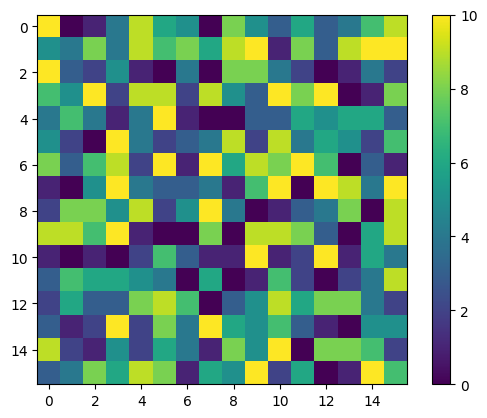

In [49]:
N = 16
img = [[randint(0, 10) for i in range(N)] for j in range(N)];

# Graficar la matriz
plt.imshow(img, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Mostrar barra de color para la escala
plt.show()

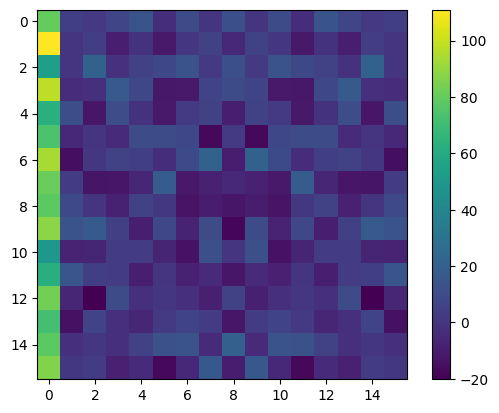

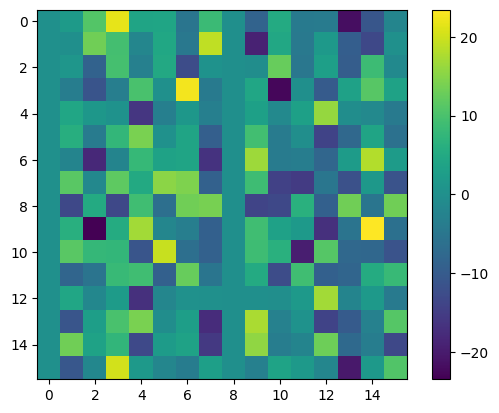

In [50]:
# print (img)
imgfp = img.copy()
for i in range(N):
    # print("img[i]:", img[i])
    linefft = fftv(img[i])
    # print(linefft)
    imgfp[i] = [linefft[j] for j in range(N)]
imgreal = [[imgfp[i][j].real for j in range(N)] for i in range(N)]
imgimag = [[imgfp[i][j].imag for j in range(N)] for i in range(N)]

# Graficar la matriz
plt.imshow(imgreal, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Mostrar barra de color para la escala
plt.show()

plt.imshow(imgimag, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Mostrar barra de color para la escala
plt.show()

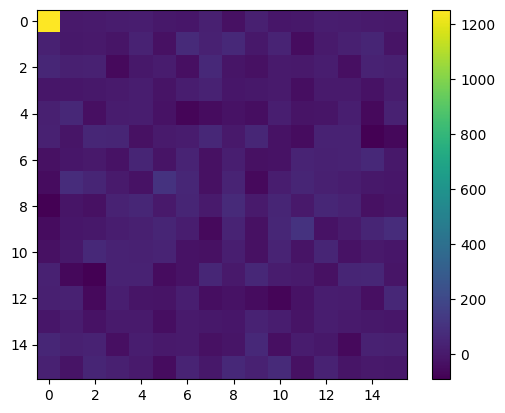

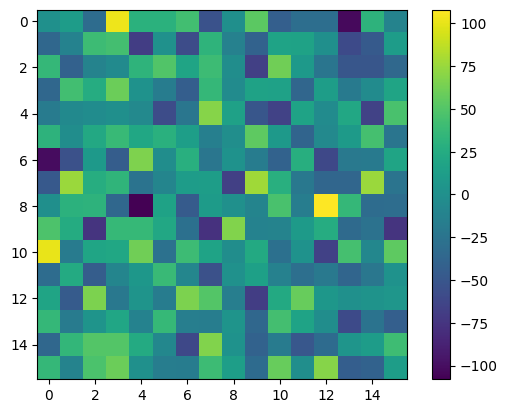

In [52]:
# print (img)
imgsp = img.copy()
for i in range(N):
    # print("img[i]:", img[i])
    linefft = fftv([imgfp[j][i] for j in range(N)])
    # print(linefft)
    for j in range(N):
        imgsp[j][i] = linefft[j]

imgreal = [[imgsp[i][j].real for j in range(N)] for i in range(N)]
imgimag = [[imgsp[i][j].imag for j in range(N)] for i in range(N)]

# Graficar la matriz
# plt.imshow(img, cmap='viridis', interpolation='nearest')
plt.imshow(imgreal, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Mostrar barra de color para la escala
plt.show()

plt.imshow(imgimag, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Mostrar barra de color para la escala
plt.show()